<a href="https://colab.research.google.com/github/BogdanT54/Serii-de-Timp/blob/main/Tema5_Serii_TimpR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalare »ôi √ÆncƒÉrcare biblioteci necesare
install.packages(c("tidyverse", "tseries", "urca", "forecast", "quantmod"), dependencies = TRUE)

# CurƒÉ»õare mediu de lucru »ôi √Ænchidere grafice
rm(list = ls())
graphics.off()

# √éncƒÉrcare biblioteci necesare
library(tidyverse)
library(tseries)
library(urca)
library(forecast)
library(quantmod)

Installing packages into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependencies ‚Äòlazyeval‚Äô, ‚Äòrex‚Äô, ‚Äòx13binary‚Äô, ‚Äòplogr‚Äô, ‚Äòcovr‚Äô, ‚Äòfeather‚Äô, ‚Äòmockr‚Äô, ‚Äòquadprog‚Äô, ‚Äòzoo‚Äô, ‚Äòfracdiff‚Äô, ‚Äòlmtest‚Äô, ‚ÄòtimeDate‚Äô, ‚ÄòRcppArmadillo‚Äô, ‚ÄòforecTheta‚Äô, ‚Äòrticles‚Äô, ‚Äòseasonal‚Äô, ‚Äòuroot‚Äô, ‚Äòxts‚Äô, ‚ÄòTTR‚Äô, ‚ÄòRMySQL‚Äô, ‚ÄòRSQLite‚Äô, ‚ÄòtimeSeries‚Äô, ‚Äòdownloader‚Äô


‚îÄ‚îÄ Attaching core tidyverse packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse 2.0.0 ‚îÄ‚îÄ
‚úî dplyr     1.1.4     ‚úî readr     2.1.5
‚úî forcats   1.0.0     ‚úî stringr   1.5.1
‚úî ggplot2   3.5.1     ‚úî tibble    3.2.1
‚úî lubridate 1.9.4     ‚úî tidyr     1.3.1
‚úî purrr     1.0.4     
‚îÄ‚îÄ Conflicts ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse_conflicts() ‚îÄ‚îÄ
‚úñ dplyr::filter() mas

In [ ]:
# DescƒÉrcƒÉm datele Bitcoin de la 1 ianuarie 2016 p√¢nƒÉ la inceputul lui 2025
btc_xts <- getSymbols("BTC-USD", src = "yahoo", from = "2016-01-01", to = "2025-01-01", auto.assign = FALSE)

# Extragem doar pre»õul de √Ænchidere
btc_close_xts <- Cl(btc_xts)

# Convertim seria xts √Æntr-un data frame
btc_df <- data.frame(
  Date = index(btc_close_xts),
  Closing_Price = as.numeric(btc_close_xts)
)


#Pun datele din data frame intr-un csv
write.csv(btc_df, "Bitcoin_USD_Pret_Inchidere.csv", row.names = FALSE)

#Verificare fisier CSV
head(btc_df)

Date       Closing_Price
1 2016-01-01 434.334      
2 2016-01-02 433.438      
3 2016-01-03 430.011      
4 2016-01-04 433.091      
5 2016-01-05 431.960      
6 2016-01-06 429.105

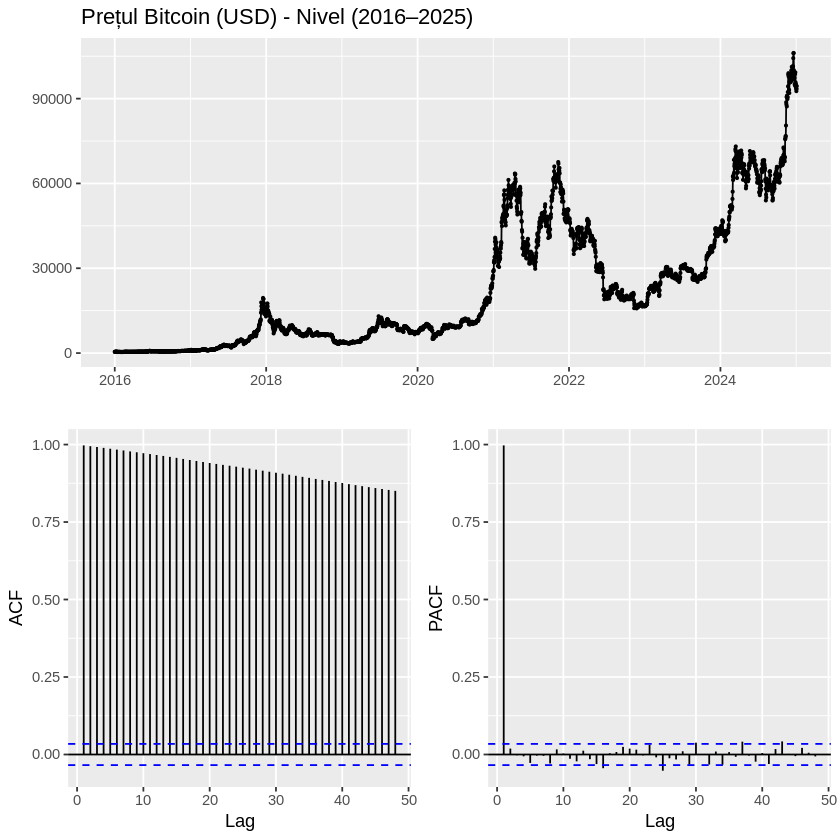

In [ ]:
# Convertim √Æn serie temporalƒÉ (frecven»õƒÉ zilnicƒÉ)
btc_ts <- ts(btc_df$Closing_Price, start = c(2016, 1), frequency = 365)

#Grafic linie + ACF/PACF pentru nivel
ggtsdisplay(btc_ts, lag.max = 48, main = "Pre»õul Bitcoin (USD) - Nivel (2016‚Äì2025)")

In [ ]:
# ADF - none
summary(ur.df(btc_ts, type = "none", lags = 14, selectlags = "AIC"))
# Exemplu interpretare: DacƒÉ stat. ADF este mai micƒÉ √Æn modul dec√¢t valorile critice, nu respingem H0 => seria NU este sta»õionarƒÉ.


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-7457.4  -173.8     2.2   182.2  8085.0 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
z.lag.1       0.0007401  0.0005672   1.305  0.19207    
z.diff.lag1  -0.0316665  0.0175289  -1.807  0.07093 .  
z.diff.lag2   0.0205182  0.0175142   1.172  0.24148    
z.diff.lag3  -0.0001213  0.0175201  -0.007  0.99448    
z.diff.lag4   0.0287249  0.0175216   1.639  0.10123    
z.diff.lag5   0.0221809  0.0174871   1.268  0.20474    
z.diff.lag6  -0.0298365  0.0174873  -1.706  0.08807 .  
z.diff.lag7  -0.0060826  0.0175307  -0.347  0.72864    
z.diff.lag8  -0.0350866  0.0175240  -2.002  0.04535 *  
z.diff.lag9   0.0716883  0.0175720   4.080 4.62e-05 ***
z.diff.lag10  0.0339675  0.0176135   1.928  0.05

# **1. Scopul testului**

Testul ADF evalueazƒÉ dacƒÉ o serie de timp este sta»õionarƒÉ (fƒÉrƒÉ tendin»õƒÉ »ôi cu varian»õƒÉ constantƒÉ). Specifica»õia none presupune cƒÉ nu existƒÉ nici termen constant (drift), nici trend determinist √Æn serie.

# **2. Formularea ipotezelor**

- H‚ÇÄ (ipoteza nulƒÉ): seria are rƒÉdƒÉcinƒÉ unitarƒÉ ‚Üí nu este sta»õionarƒÉ
- H‚ÇÅ (ipoteza alternativƒÉ): seria este sta»õionarƒÉ

# **3. Valori statistice ob»õinute**

- Statistica ADF: 1.3048
Valori critice:
- 1%: ‚àí2.58
- 5%: ‚àí1.95
- 10%: ‚àí1.62

# **4. Compara»õie »ôi concluzie**

Statistica testului este mai mare dec√¢t toate valorile critice. Prin urmare, nu existƒÉ suficiente dovezi pentru a respinge ipoteza nulƒÉ.

# **5. Interpretare economicƒÉ**

Seria pre»õului de √Ænchidere al Bitcoinului √Æn perioada 2016‚Äì2025 nu este sta»õionarƒÉ √Æn nivel. Valorile prezintƒÉ o tendin»õƒÉ persistentƒÉ »ôi sunt influen»õate de »ôocuri trecute, ceea ce este tipic pentru serii financiare.

# **6. Implica»õii pentru modelare**

√éntruc√¢t seria nu este sta»õionarƒÉ, este necesarƒÉ diferen»õierea de ordinul 1 pentru a putea aplica un model ARIMA valid.

In [ ]:
# ADF - drift (constanta)
summary(ur.df(btc_ts, type = "drift", lags = 14, selectlags = "AIC"))
# Interpretare: verificƒÉm semnifica»õia coef. phi1 »ôi valoarea ADF pentru concluzie


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-7452.2  -185.6   -17.4   169.4  8099.4 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.8585708 24.9365829   0.836  0.40295    
z.lag.1       0.0002657  0.0008021   0.331  0.74044    
z.diff.lag1  -0.0314032  0.0175325  -1.791  0.07336 .  
z.diff.lag2   0.0207494  0.0175172   1.185  0.23629    
z.diff.lag3   0.0001235  0.0175234   0.007  0.99438    
z.diff.lag4   0.0289954  0.0175254   1.654  0.09813 .  
z.diff.lag5   0.0224758  0.0174914   1.285  0.19890    
z.diff.lag6  -0.0295354  0.0174918  -1.689  0.09141 .  
z.diff.lag7  -0.0057631  0.0175357  -0.329  0.74244    
z.diff.lag8  -0.0347828  0.0175286  -1.984  0.04730 *  
z.diff.lag9   0.0719616  0.0175759   4.094 4.34

# **1. Scopul testului**

Testul ADF verificƒÉ dacƒÉ o serie de timp este sta»õionarƒÉ. Specifica»õia drift presupune cƒÉ seria poate avea o constantƒÉ (nivel mediu diferit de zero), dar fƒÉrƒÉ trend determinist.

# **2. Formularea ipotezelor**
- H‚ÇÄ: seria are rƒÉdƒÉcinƒÉ unitarƒÉ ‚Üí nu este sta»õionarƒÉ
- H‚ÇÅ: seria este sta»õionarƒÉ

# **3. Valori statistice ob»õinute**

Statistica ADF (tau2): 0.3313

Valori critice ADF:
- 1%: ‚àí3.43
- 5%: ‚àí2.86
- 10%: ‚àí2.57
- Statistica phi1 (pentru drift): 1.201

Valori critice phi1:
- 1%: 6.43
- 5%: 4.59
- 10%: 3.78

# **4. Compara»õie »ôi concluzie**
Valoarea statisticii ADF este mai mare dec√¢t toate valorile critice, deci nu respingem H‚ÇÄ. De asemenea, coeficientul constantei (phi1) nu este semnificativ statistic (p > 0.05).

# **5. Interpretare economicƒÉ**
Seria pre»õului Bitcoin (2016‚Äì2025) nu este sta»õionarƒÉ nici c√¢nd presupunem existen»õa unui drift. Lipsa semnifica»õiei constantei sugereazƒÉ cƒÉ nici un nivel fix nu caracterizeazƒÉ evolu»õia. Pre»õul variazƒÉ haotic »ôi persistent √Æn timp.

# **6. Implica»õii pentru modelare**
Diferen»õierea seriei este √Æn continuare necesarƒÉ pentru a o face sta»õionarƒÉ. Vom testa forma diferen»õiatƒÉ √Æn pa»ôii urmƒÉtori »ôi vom estima un model ARIMA corespunzƒÉtor.

In [ ]:
# ADF - trend (trend determinist)
summary(ur.df(btc_ts, type = "trend", lags = 14, selectlags = "AIC"))
# Interpretare: verificƒÉm tau3 (ADF), phi2 (constanta), phi3 (trendul)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-7400.6  -207.4    13.5   172.3  8115.4 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -33.012197  37.354371  -0.884  0.37689    
z.lag.1       -0.001871   0.001364  -1.372  0.17026    
tt             0.061406   0.031713   1.936  0.05292 .  
z.diff.lag1   -0.030394   0.017533  -1.734  0.08310 .  
z.diff.lag2    0.021640   0.017516   1.235  0.21675    
z.diff.lag3    0.001062   0.017523   0.061  0.95168    
z.diff.lag4    0.030008   0.017526   1.712  0.08695 .  
z.diff.lag5    0.023596   0.017494   1.349  0.17748    
z.diff.lag6   -0.028403   0.017494  -1.624  0.10457    
z.diff.lag7   -0.004612   0.017538  -0.263  0.79260    
z.diff.lag8   -0.033685   0.017530  -1.921

# **1. Scopul testului**

Testul ADF evalueazƒÉ dacƒÉ o serie de timp este sta»õionarƒÉ. Specifica»õia trend presupune cƒÉ seria poate avea at√¢t o constantƒÉ, c√¢t »ôi un trend liniar determinist.

# **2. Formularea ipotezelor**
- H‚ÇÄ: seria are rƒÉdƒÉcinƒÉ unitarƒÉ ‚Üí nu este sta»õionarƒÉ
- H‚ÇÅ: seria este sta»õionarƒÉ

# **3. Valori statistice ob»õinute**

Statistica ADF (tau3): -1.3717

Valori critice ADF:
- 1%: ‚àí3.96
- 5%: ‚àí3.41
- 10%: ‚àí3.12

- Statistica phi2 (constanta): 2.0511  
- Statistica phi3 (trendul): 1.9295

Valori critice phi2:
- 1%: 6.29
- 5%: 4.68
- 10%: 4.03

Valori critice phi3:
- 1%: 8.27
- 5%: 6.25
- 10%: 5.34

# **4. Compara»õie »ôi concluzie**
Statistica ADF este mai mare dec√¢t toate valorile critice √Æn modul, deci nu respingem H‚ÇÄ. Nici constanta »ôi nici trendul nu sunt semnificative statistic, conform valorilor phi2 »ôi phi3.

# **5. Interpretare economicƒÉ**
Seria pre»õului Bitcoin (2016‚Äì2025) nu este sta»õionarƒÉ nici c√¢nd presupunem existen»õa unui trend determinist. Evolu»õia seriei pare a fi dominatƒÉ de factori neobserva»õi »ôi instabilitate structuralƒÉ.

# **6. Implica»õii pentru modelare**
Modelarea trebuie continuatƒÉ cu seria diferen»õiatƒÉ. Rezultatul sus»õine ipoteza cƒÉ seria este I(1) »ôi necesitƒÉ aplicarea unui model ARIMA cu D = 1.


In [ ]:
# PP - constant
summary(ur.pp(btc_ts, type = "Z-tau", model = "constant"))
# DacƒÉ stat. este mai micƒÉ √Æn modul dec√¢t criticele => NU respingem H0 => seria NU e sta»õionarƒÉ


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
    Min      1Q  Median      3Q     Max 
-7597.0  -185.9   -16.9   171.3  8174.4 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 19.218085  24.864066    0.773     0.44    
y.l1         1.000419   0.000787 1271.156   <2e-16 ***
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 1008 on 3286 degrees of freedom
Multiple R-squared:  0.998,	Adjusted R-squared:  0.998 
F-statistic: 1.616e+06 on 1 and 3286 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-tau  is: 0.5381 

         aux. Z statistics
Z-tau-mu             0.771

Critical values for Z statistics: 
                     1pct      5pct     10pct
critical values -3.435327 -2.862933 -2.567538


# **1. Scopul testului**

Testul Phillips-Perron (PP) verificƒÉ sta»õionaritatea unei serii de timp, ca alternativƒÉ robustƒÉ la ADF. Specifica»õia constant presupune prezen»õa unui termen constant (intercept), dar fƒÉrƒÉ trend.

# **2. Formularea ipotezelor**
- H‚ÇÄ: seria are rƒÉdƒÉcinƒÉ unitarƒÉ ‚Üí nu este sta»õionarƒÉ
- H‚ÇÅ: seria este sta»õionarƒÉ

# **3. Valori statistice ob»õinute**

Statistica PP (Z-tau-mu): 0.771

Valori critice:
- 1%: ‚àí3.4353
- 5%: ‚àí2.8629
- 10%: ‚àí2.5676

# **4. Compara»õie »ôi concluzie**
Statistica testului este mai mare dec√¢t toate valorile critice. Prin urmare, nu respingem ipoteza nulƒÉ H‚ÇÄ conform cƒÉreia seria nu este sta»õionarƒÉ.

# **5. Interpretare economicƒÉ**
Seria pre»õului Bitcoin (2016‚Äì2025) rƒÉm√¢ne nesta»õionarƒÉ »ôi √Æn cadrul testului PP. Aceasta confirmƒÉ instabilitatea mediei »ôi dependen»õa de »ôocuri anterioare √Æn evolu»õia pie»õei crypto.

# **6. Implica»õii pentru modelare**
Rezultatul sus»õine nevoia de diferen»õiere a seriei √Ænainte de estimarea unui model ARIMA. Aceasta este o etapƒÉ esen»õialƒÉ pentru validitatea analizei de tip forecast.

In [ ]:
# PP - trend
summary(ur.pp(btc_ts, type = "Z-tau", model = "trend"))


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept and trend 


Call:
lm(formula = y ~ y.l1 + trend)

Residuals:
    Min      1Q  Median      3Q     Max 
-7547.3  -205.2    12.8   164.4  8197.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 63.225571  34.653079   1.825   0.0682 .  
y.l1         0.998449   0.001337 746.747   <2e-16 ***
trend        0.057328   0.031455   1.823   0.0685 .  
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 1007 on 3285 degrees of freedom
Multiple R-squared:  0.998,	Adjusted R-squared:  0.998 
F-statistic: 8.085e+05 on 2 and 3285 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-tau  is: -1.1683 

           aux. Z statistics
Z-tau-mu              1.8104
Z-tau-beta            1.8269

Critical values for Z statistics: 
                     1pct     5pct     10pct


# **1. Scopul testului**

Testul Phillips-Perron (PP) evalueazƒÉ dacƒÉ o serie este sta»õionarƒÉ, folosind estimƒÉri robuste la heteroscedasticitate. Specifica»õia trend presupune prezen»õa unei constante »ôi a unui trend determinist √Æn model.

# **2. Formularea ipotezelor**
- H‚ÇÄ: seria are rƒÉdƒÉcinƒÉ unitarƒÉ ‚Üí nu este sta»õionarƒÉ
- H‚ÇÅ: seria este sta»õionarƒÉ

# **3. Valori statistice ob»õinute**

Statistica Z-tau: ‚àí1.1683

Valori critice:
- 1%: ‚àí3.966345
- 5%: ‚àí3.41383
- 10%: ‚àí3.128636

# **4. Compara»õie »ôi concluzie**
Valoarea statisticii Z-tau este mai mare dec√¢t toate valorile critice. Nu putem respinge ipoteza nulƒÉ H‚ÇÄ, deci considerƒÉm cƒÉ seria nu este sta»õionarƒÉ nici √Æn prezen»õa unui trend determinist.

# **5. Interpretare economicƒÉ**
Seria Bitcoin (2016‚Äì2025) √Æ»ôi pƒÉstreazƒÉ comportamentul de serie nesta»õionarƒÉ, chiar »ôi atunci c√¢nd presupunem existen»õa unui trend. Evolu»õia sa este dominatƒÉ de »ôocuri externe »ôi nu are o tendin»õƒÉ stabilƒÉ sau predictibilƒÉ.

# **6. Implica»õii pentru modelare**
Modelarea ulterioarƒÉ trebuie sƒÉ porneascƒÉ de la o formƒÉ diferen»õiatƒÉ a seriei. Este indicatƒÉ estimarea unui model ARIMA cu D = 1 pentru o analizƒÉ corectƒÉ.

In [ ]:
# KPSS - mu (constanta)
summary(ur.kpss(btc_ts, type = "mu"))
# DacƒÉ stat. > valori critice => respingem H0 => seria NU e sta»õionarƒÉ


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 9 lags. 

Value of test-statistic is: 21.7143 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


# **1. Scopul testului**

Testul KPSS evalueazƒÉ sta»õionaritatea unei serii de timp dintr-o perspectivƒÉ opusƒÉ testelor ADF »ôi PP. Specifica»õia mu testeazƒÉ dacƒÉ seria este sta»õionarƒÉ √Æn jurul unei constante.

# **2. Formularea ipotezelor**
- H‚ÇÄ: seria este sta»õionarƒÉ
- H‚ÇÅ: seria nu este sta»õionarƒÉ

# **3. Valori statistice ob»õinute**

Statistica KPSS: 21.7143

Valori critice:
- 10%: 0.347
- 5%: 0.463
- 2.5%: 0.574
- 1%: 0.739

# **4. Compara»õie »ôi concluzie**
Valoarea statisticii testului este mult mai mare dec√¢t toate valorile critice. Prin urmare, respingem ipoteza nulƒÉ conform cƒÉreia seria este sta»õionarƒÉ.

# **5. Interpretare economicƒÉ**
Rezultatul confirmƒÉ faptul cƒÉ seria pre»õului Bitcoin (2016‚Äì2025) nu este sta»õionarƒÉ. Aceasta nu fluctueazƒÉ √Æn jurul unei medii constante »ôi prezintƒÉ o volatilitate excesivƒÉ.

# **6. Implica»õii pentru modelare**
Este necesarƒÉ diferen»õierea seriei pentru a ob»õine o formƒÉ sta»õionarƒÉ. Acest rezultat sus»õine concluziile testelor ADF »ôi PP anterioare.

In [ ]:
# KPSS - tau (trend)
summary(ur.kpss(btc_ts, type = "tau"))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 9 lags. 

Value of test-statistic is: 1.4168 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


# **1. Scopul testului**

Testul KPSS evalueazƒÉ dacƒÉ o serie este sta»õionarƒÉ √Æn jurul unui trend determinist. Specifica»õia tau presupune cƒÉ datele pot avea at√¢t o constantƒÉ, c√¢t »ôi un trend liniar stabil.

# **2. Formularea ipotezelor**
- H‚ÇÄ: seria este sta»õionarƒÉ √Æn jurul unui trend determinist
- H‚ÇÅ: seria nu este sta»õionarƒÉ

# **3. Valori statistice ob»õinute**

Statistica KPSS: 1.4168

Valori critice:
- 10%: 0.119
- 5%: 0.146
- 2.5%: 0.176
- 1%: 0.216

# **4. Compara»õie »ôi concluzie**
Statistica testului este mult mai mare dec√¢t toate valorile critice. Respinge ipoteza nulƒÉ, deci concluzionƒÉm cƒÉ seria nu este sta»õionarƒÉ nici √Æn jurul unui trend determinist.

# **5. Interpretare economicƒÉ**
Pre»õul Bitcoin (2016‚Äì2025) nu urmeazƒÉ un trend liniar stabil »ôi prezintƒÉ instabilitate pe termen lung. Seria este afectatƒÉ de »ôocuri persistente »ôi volatilitate ridicatƒÉ.

# **6. Implica»õii pentru modelare**
Pentru a modela corect seria, este necesarƒÉ aplicarea diferen»õierii. AceastƒÉ concluzie confirmƒÉ rezultatele tuturor testelor anterioare.

In [ ]:
# === 4. Diferen»õierea seriei pentru sta»õionarizare ===
btc_diff <- diff(btc_ts)

Facem diferen»õierea seriei pentru a o transforma √Æntr-o formƒÉ sta»õionarƒÉ, necesarƒÉ pentru aplicarea corectƒÉ a modelelor ARIMA. Seria originalƒÉ a pre»õului Bitcoin nu are medie »ôi varian»õƒÉ constante √Æn timp, ceea ce √ÆncalcƒÉ ipotezele de bazƒÉ ale acestor modele. Prin aplicarea func»õiei diff(), eliminƒÉm trendul »ôi ob»õinem o serie stabilƒÉ, ce reflectƒÉ varia»õiile zilnice (randamentele). AceastƒÉ transformare corespunde diferen»õierii de ordinul 1, adicƒÉ D = 1 √Æn modelul ARIMA(P,D,Q).

In [ ]:
# === 5. Teste pe seria diferen»õiatƒÉ ===

# ADF - none
summary(ur.df(btc_diff, type = "none", lags = 14, selectlags = "AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-7418.8  -161.6     4.3   195.7  8130.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
z.lag.1      -0.917645   0.061570 -14.904  < 2e-16 ***
z.diff.lag1  -0.112733   0.059277  -1.902  0.05728 .  
z.diff.lag2  -0.091010   0.057172  -1.592  0.11151    
z.diff.lag3  -0.089907   0.054924  -1.637  0.10174    
z.diff.lag4  -0.059868   0.052374  -1.143  0.25308    
z.diff.lag5  -0.036304   0.049234  -0.737  0.46095    
z.diff.lag6  -0.064781   0.046102  -1.405  0.16006    
z.diff.lag7  -0.069420   0.042799  -1.622  0.10490    
z.diff.lag8  -0.103115   0.039419  -2.616  0.00894 ** 
z.diff.lag9  -0.030076   0.035541  -0.846  0.39748    
z.diff.lag10  0.005251   0.030877   0.170  0.86497    
z.di

# **1. Scopul testului**

Testul ADF verificƒÉ dacƒÉ o serie este sta»õionarƒÉ. Specifica»õia `none` nu include nici constantƒÉ, nici trend, »ôi este folositƒÉ aici pentru a testa sta»õionaritatea seriei diferen»õiate.

# **2. Formularea ipotezelor**
- H‚ÇÄ: seria are rƒÉdƒÉcinƒÉ unitarƒÉ ‚Üí nu este sta»õionarƒÉ
- H‚ÇÅ: seria este sta»õionarƒÉ

# **3. Valori statistice ob»õinute**

Statistica ADF: ‚àí14.9041

Valori critice:
- 1%: ‚àí2.58
- 5%: ‚àí1.95
- 10%: ‚àí1.62

# **4. Compara»õie »ôi concluzie**
Statistica testului este mult mai micƒÉ dec√¢t toate valorile critice. Astfel, respingem ipoteza nulƒÉ »ôi concluzionƒÉm cƒÉ seria diferen»õiatƒÉ este sta»õionarƒÉ.

# **5. Interpretare economicƒÉ**
DupƒÉ diferen»õiere, pre»õul Bitcoin devine o serie sta»õionarƒÉ, cu varia»õii stabile √Æn jurul unei medii. Aceasta indicƒÉ faptul cƒÉ randamentele (nu nivelurile) sunt predictibile √Æntr-un cadru statistic.

# **6. Implica»õii pentru modelare**
Putem continua estimarea unui model ARIMA pe seria diferen»õiatƒÉ. Rezultatul confirmƒÉ necesitatea diferen»õierii (D = 1) √Æn modelul ARIMA(P, D, Q).

In [ ]:
# ADF - drift
summary(ur.df(btc_diff, type = "drift", lags = 14, selectlags = "AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-7443.8  -188.2   -22.6   171.4  8111.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.701675  17.638236   1.514   0.1302    
z.lag.1      -0.927218   0.061882 -14.984   <2e-16 ***
z.diff.lag1  -0.103880   0.059553  -1.744   0.0812 .  
z.diff.lag2  -0.082850   0.057414  -1.443   0.1491    
z.diff.lag3  -0.082438   0.055134  -1.495   0.1350    
z.diff.lag4  -0.053131   0.052552  -1.011   0.3121    
z.diff.lag5  -0.030324   0.049383  -0.614   0.5392    
z.diff.lag6  -0.059531   0.046223  -1.288   0.1979    
z.diff.lag7  -0.064946   0.042893  -1.514   0.1301    
z.diff.lag8  -0.099393   0.039488  -2.517   0.0119 *  
z.diff.lag9  -0.027113   0.035588  -0.762   0.4462    
z.d

# **1. Scopul testului**

Testul ADF evalueazƒÉ dacƒÉ o serie este sta»õionarƒÉ. Specifica»õia drift permite prezen»õa unui termen constant (nivel mediu diferit de zero) √Æn seria analizatƒÉ.

# **2. Formularea ipotezelor**
- H‚ÇÄ: seria are rƒÉdƒÉcinƒÉ unitarƒÉ ‚Üí nu este sta»õionarƒÉ
- H‚ÇÅ: seria este sta»õionarƒÉ

# **3. Valori statistice ob»õinute**

Statistica ADF (tau2): ‚àí14.9837  
Valori critice ADF:
- 1%: ‚àí3.43
- 5%: ‚àí2.86
- 10%: ‚àí2.57

Statistica phi1 (constanta): 112.2554  
Valori critice phi1:
- 1%: 6.43
- 5%: 4.59
- 10%: 3.78

# **4. Compara»õie »ôi concluzie**
Statistica ADF este mult mai micƒÉ dec√¢t valorile critice, deci respingem H‚ÇÄ. Constanta este semnificativƒÉ statistic, conform valorii phi1 foarte mari, confirm√¢nd prezen»õa unui nivel stabil.

# **5. Interpretare economicƒÉ**
DupƒÉ diferen»õiere, seria pre»õului Bitcoin devine sta»õionarƒÉ »ôi prezintƒÉ o medie constantƒÉ. Acest comportament este tipic pentru randamente, nu pentru nivelurile de pre»õ.

# **6. Implica»õii pentru modelare**
Seria este acum potrivitƒÉ pentru modelare ARIMA, cu D = 1. Se poate trece la identificarea valorilor P »ôi Q pentru construc»õia completƒÉ a modelului.

In [ ]:
# ADF - trend
summary(ur.df(btc_diff, type = "trend", lags = 14, selectlags = "AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-7450.5  -194.4     8.9   173.8  8076.5 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -16.364916  35.339027  -0.463   0.6433    
z.lag.1       -0.935650   0.062162 -15.052   <2e-16 ***
tt             0.026234   0.018655   1.406   0.1597    
z.diff.lag1   -0.096063   0.059803  -1.606   0.1083    
z.diff.lag2   -0.075618   0.057636  -1.312   0.1896    
z.diff.lag3   -0.075795   0.055328  -1.370   0.1708    
z.diff.lag4   -0.047126   0.052718  -0.894   0.3714    
z.diff.lag5   -0.024977   0.049522  -0.504   0.6140    
z.diff.lag6   -0.054828   0.046337  -1.183   0.2368    
z.diff.lag7   -0.060948   0.042981  -1.418   0.1563    
z.diff.lag8   -0.096077   0.039552  -2.429

# **1. Scopul testului**

Testul ADF evalueazƒÉ sta»õionaritatea unei serii de timp. Specifica»õia trend presupune cƒÉ modelul include at√¢t o constantƒÉ, c√¢t »ôi un trend liniar determinist, util pentru a analiza serii cu tendin»õƒÉ.

# **2. Formularea ipotezelor**
- H‚ÇÄ: seria are rƒÉdƒÉcinƒÉ unitarƒÉ ‚Üí nu este sta»õionarƒÉ
- H‚ÇÅ: seria este sta»õionarƒÉ

# **3. Valori statistice ob»õinute**

Statistica ADF (tau3): ‚àí15.0517  
Valori critice:
- 1%: ‚àí3.96  
- 5%: ‚àí3.41  
- 10%: ‚àí3.12

Statistici suplimentare:
- phi2 (pentru constantƒÉ): 75.5186  
- phi3 (pentru trend): 113.2778  
Valori critice:
- phi2: 6.09 (1%), 4.68 (5%), 4.03 (10%)  
- phi3: 8.27 (1%), 6.25 (5%), 5.34 (10%)

# **4. Compara»õie »ôi concluzie**
Toate valorile testului sunt mai extreme dec√¢t valorile critice. Prin urmare, respingem ipoteza nulƒÉ »ôi concluzionƒÉm cƒÉ seria diferen»õiatƒÉ este sta»õionarƒÉ.

# **5. Interpretare economicƒÉ**
Seria diferen»õiatƒÉ a pre»õului Bitcoin (2016‚Äì2025) este sta»õionarƒÉ √Æn jurul unui trend liniar. Aceasta indicƒÉ o varia»õie relativ stabilƒÉ a randamentelor √Æn timp, tipicƒÉ pentru active financiare.

# **6. Implica»õii pentru modelare**
Rezultatul confirmƒÉ cƒÉ seria este I(1), deci potrivitƒÉ pentru modelare ARIMA cu D = 1. Putem trece la identificarea valorilor P »ôi Q.

In [ ]:
# PP
summary(ur.pp(btc_diff, type = "Z-tau", model = "constant"))
summary(ur.pp(btc_diff, type = "Z-tau", model = "trend"))


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
    Min      1Q  Median      3Q     Max 
-7554.7  -188.3   -26.2   167.8  8324.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 29.56221   17.57641   1.682   0.0927 .
y.l1        -0.03425    0.01744  -1.964   0.0497 *
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 1007 on 3285 degrees of freedom
Multiple R-squared:  0.001172,	Adjusted R-squared:  0.0008684 
F-statistic: 3.856 on 1 and 3285 DF,  p-value: 0.04965


Value of test-statistic, type: Z-tau  is: -59.2705 

         aux. Z statistics
Z-tau-mu             1.681

Critical values for Z statistics: 
                     1pct      5pct     10pct
critical values -3.435328 -2.862934 -2.567538



################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept and trend 


Call:
lm(formula = y ~ y.l1 + trend)

Residuals:
    Min      1Q  Median      3Q     Max 
-7563.1  -197.9     9.3   170.5  8281.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 29.56755   17.57262   1.683   0.0925 .
y.l1        -0.03494    0.01744  -2.003   0.0452 *
trend        0.02878    0.01852   1.554   0.1202  
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 1007 on 3284 degrees of freedom
Multiple R-squared:  0.001907,	Adjusted R-squared:  0.001299 
F-statistic: 3.137 on 2 and 3284 DF,  p-value: 0.04355


Value of test-statistic, type: Z-tau  is: -59.3031 

           aux. Z statistics
Z-tau-mu              1.5869
Z-tau-beta            1.5535

Critical values for Z statistics: 
                     1pct     5pct     10pct
critical va

# **1. Scopul testului**

Testul Phillips-Perron (PP) verificƒÉ sta»õionaritatea unei serii de timp, fiind o alternativƒÉ robustƒÉ la ADF. Modelele cu constant »ôi trend permit includerea unei constante »ôi, respectiv, a unui trend determinist.

# **2. Formularea ipotezelor**
- H‚ÇÄ: seria are rƒÉdƒÉcinƒÉ unitarƒÉ ‚Üí nu este sta»õionarƒÉ
- H‚ÇÅ: seria este sta»õionarƒÉ

# **3. Valori statistice ob»õinute**

üìå *Pentru modelul cu constantƒÉ:*
- Statistica Z-tau: ‚àí59.2705  
- Valori critice:  
  - 1%: ‚àí3.4353  
  - 5%: ‚àí2.8629  
  - 10%: ‚àí2.5676

üìå *Pentru modelul cu constantƒÉ »ôi trend:*
- Statistica Z-tau: ‚àí59.3031  
- Valori critice:  
  - 1%: ‚àí3.9663  
  - 5%: ‚àí3.4138  
  - 10%: ‚àí3.1286

# **4. Compara»õie »ôi concluzie**
√én ambele cazuri, valorile testului sunt mult mai mici dec√¢t valorile critice. Astfel, respingem ipoteza nulƒÉ H‚ÇÄ ‚Üí seria diferen»õiatƒÉ este clar sta»õionarƒÉ, indiferent de specifica»õie.

# **5. Interpretare economicƒÉ**
DupƒÉ diferen»õiere, pre»õul Bitcoin devine o serie stabilƒÉ »ôi predictibilƒÉ statistic. Acest comportament este tipic pentru randamente, care nu prezintƒÉ trend sau medie instabilƒÉ √Æn timp.

# **6. Implica»õii pentru modelare**
Seria diferen»õiatƒÉ este potrivitƒÉ pentru modelare ARIMA. Confirmarea sta»õionaritƒÉ»õii prin PP sus»õine alegerea unui model cu D = 1.

In [ ]:
# KPSS
summary(ur.kpss(btc_diff, type = "mu"))
summary(ur.kpss(btc_diff, type = "tau"))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 9 lags. 

Value of test-statistic is: 0.2644 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 9 lags. 

Value of test-statistic is: 0.0851 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


# **1. Scopul testului**

Testul KPSS evalueazƒÉ dacƒÉ o serie este sta»õionarƒÉ, formul√¢nd o ipotezƒÉ nulƒÉ opusƒÉ testelor ADF »ôi PP. Specifica»õia mu testeazƒÉ sta»õionaritatea √Æn jurul unei constante, iar tau √Æn jurul unui trend determinist.

# **2. Formularea ipotezelor**
- H‚ÇÄ: seria este sta»õionarƒÉ
- H‚ÇÅ: seria nu este sta»õionarƒÉ

# **3. Valori statistice ob»õinute**

üìå Pentru specifica»õia mu (constanta):  
- Statistica KPSS: 0.2644  
- Valori critice:
  - 10%: 0.347
  - 5%: 0.463
  - 2.5%: 0.574
  - 1%: 0.739

üìå Pentru specifica»õia tau (trend):  
- Statistica KPSS: 0.0851  
- Valori critice:
  - 10%: 0.119
  - 5%: 0.146
  - 2.5%: 0.176
  - 1%: 0.216

# **4. Compara»õie »ôi concluzie**

√én ambele cazuri, valorile testului sunt mai mici dec√¢t toate valorile critice. Prin urmare, nu respingem ipoteza nulƒÉ »ôi concluzionƒÉm cƒÉ seria diferen»õiatƒÉ este sta»õionarƒÉ.

# **5. Interpretare economicƒÉ**

Rezultatele aratƒÉ cƒÉ seria diferen»õiatƒÉ a pre»õului Bitcoin este sta»õionarƒÉ at√¢t √Æn jurul unei medii constante, c√¢t »ôi √Æn jurul unui trend determinist. Randamentele zilnice nu prezintƒÉ instabilitate sistematicƒÉ pe termen lung.

# **6. Implica»õii pentru modelare**

Testele KPSS confirmƒÉ cƒÉ seria este I(1). Se poate aplica un model ARIMA cu diferen»õiere de ordinul 1 pentru prognozƒÉ sau analizƒÉ.


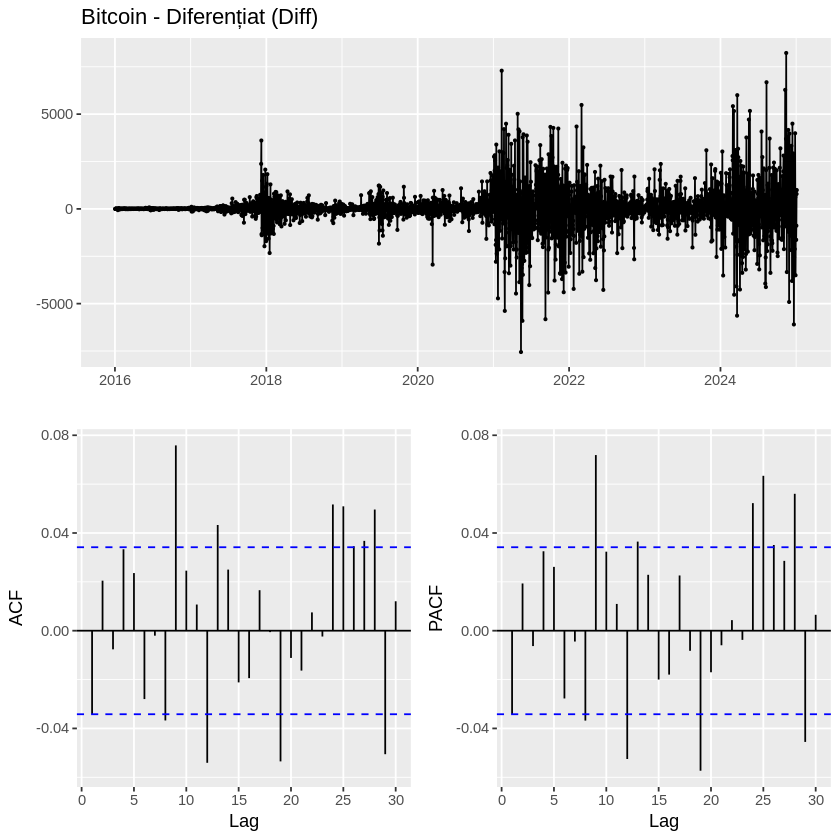

In [ ]:
# === 6. CorelogramƒÉ pentru seria diferen»õiatƒÉ ===
ggtsdisplay(btc_diff, lag.max = 30, main = "Bitcoin - Diferen»õiat (Diff)")

**ACF**: Se observƒÉ autocorela»õii semnificative la lagurile 8, 9, 12, 19, 24‚Äì29.

**PACF**: Valoril semnificative la lagurile 7, 8, 13, 14, 19, 24‚Äì26, 28, 29.

In [ ]:
# === 7. Identificarea modelului ARIMA ===
model_arima <- auto.arima(btc_ts)
summary(model_arima)

Series: btc_ts 
ARIMA(0,1,1) with drift 

Coefficients:
          ma1    drift
      -0.0329  28.5834
s.e.   0.0171  16.9809

sigma^2 = 1014390:  log likelihood = -27400.66
AIC=54807.31   AICc=54807.32   BIC=54825.61

Training set error measures:
                       ME    RMSE      MAE        MPE     MAPE       MASE
Training set -0.009084953 1006.71 526.0021 -0.8451953 2.862234 0.03394872
                      ACF1
Training set -0.0006730069

Modelul estimat este ARIMA(0,1,1) cu drift, adicƒÉ o serie diferen»õiatƒÉ o datƒÉ (D = 1), fƒÉrƒÉ componentƒÉ AR (P = 0), dar cu o componentƒÉ MA(1) (Q = 1) »ôi un drift semnificativ.

# **Interpretare:**

MA(1) = ‚Äì0.0329: indicƒÉ o dependen»õƒÉ slabƒÉ de eroarea anterioarƒÉ.

Drift = 28.5834: semnaleazƒÉ o tendin»õƒÉ ascendentƒÉ medie a seriei (cre»ôtere lentƒÉ √Æn timp).

AIC = 54807.31 / BIC = 54825.61: valori relativ mici ‚Üí modelul este eficient »ôi bine calibrat.

Reziduurile au autocorelare foarte micƒÉ (ACF1 = ‚Äì0.00067), deci nu existƒÉ pattern-uri nereziduale ‚Üí validare bunƒÉ a modelului.